# Exercise 9

Underfitting, Overfitting and Regularization methods



In [1]:
from sklearn.datasets import make_moons
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tf.keras.backend.set_floatx('float64')

from keras.regularizers import l1, l2, l1_l2

(1000, 2) (1000,)


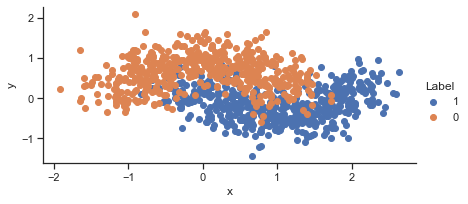

In [2]:
# Generate dataset which will be used to demonstrate underfitting or overfitting 

sns.set(style='ticks')

dots,labels = make_moons(n_samples=1000, noise=0.30, random_state=1)
print(dots.shape,labels.shape)
df = pd.DataFrame(data={'x':dots[:,0], 'y':dots[:,1], 'Label':labels})

# Copied from: https://stackoverflow.com/questions/14885895/color-by-column-values-in-matplotlib
fig = sns.FacetGrid(data=df, hue='Label', hue_order=df['Label'].unique(), aspect=2)
fig.map(plt.scatter, 'x', 'y').add_legend()

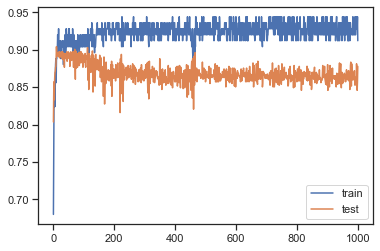

In [3]:
# Splitting the dataset
train_X, train_y = dots[:len(dots) // 8, :], labels[:len(dots) // 8]
test_X, test_y = dots[len(dots) // 8:, :], labels[len(dots) // 8:]

# Create simple neural network
model_overfit = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = tf.keras.optimizers.Adam(lr = 0.1)
model_overfit.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])

# Define validation set in order to accuracy can be recorder 
history_overfit = model_overfit.fit(train_X,
                train_y,
                validation_data = (test_X,test_y),
                batch_size = 2**5,
                epochs=1000,
                verbose=0)

# Plot the accucary and validation accuracy
plt.plot(history_overfit.history['accuracy'],label='train')
plt.plot(history_overfit.history['val_accuracy'],label='test')
plt.legend()
plt.show()

Explain the above figure?

The accuracy in the test dataset is not nearly as good as on the training dataset. We can see that the accury of both datasets overlaps in the beginning (maybe 100 first epochs in Mika's example picture) and then the model starts to overfit based on the training data and same accuray cannot be achieved with the unseen data.

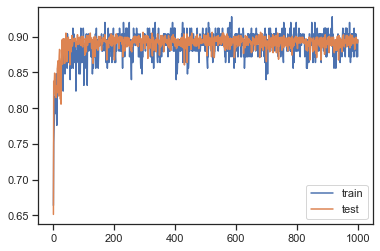

In [4]:
## L2 Regularization
## Use exactly same NN but add L2 Regularization
model_l2 = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_shape=(2,), kernel_regularizer = l2(0.01) ),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = tf.keras.optimizers.Adam(lr = 0.1)
model_l2.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])

# Define validation set in order to accuracy can be recorder 
history_l2 = model_l2.fit(train_X,
                train_y,
                validation_data = (test_X, test_y),
                batch_size = 2**5,
                epochs = 1000,
                verbose = 0)

# Plot the accucary and validation accuracy
plt.plot(history_l2.history['accuracy'], label='train')
plt.plot(history_l2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

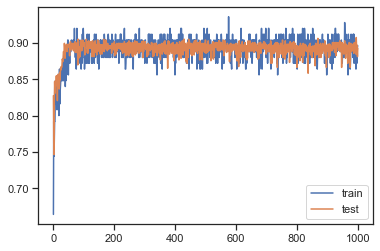

In [5]:
## L1 Regularization
## Use exactly same NN but add L1 Regularization
model_l1 = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_shape=(2,), kernel_regularizer = l1(0.01) ),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = tf.keras.optimizers.Adam(lr = 0.1)
model_l1.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])

# Define validation set in order to accuracy can be recorder 
history_l1 = model_l1.fit(train_X,
                train_y,
                validation_data = (test_X, test_y),
                batch_size = 2**5,
                epochs = 1000,
                verbose = 0)

# Plot the accucary and validation accuracy
plt.plot(history_l1.history['accuracy'], label='train')
plt.plot(history_l1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

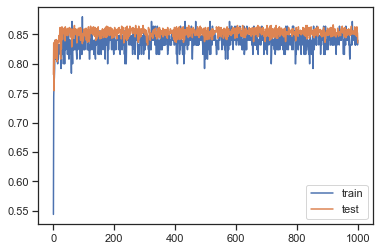

In [6]:
## L1_L2 Regularization
## Use exactly same NN but add L1 and L2 Regularization

model_l1_l2 = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_shape=(2,), kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01) ),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = tf.keras.optimizers.Adam(lr = 0.1)
model_l1_l2.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])

# Define validation set in order to accuracy can be recorder 
history_l1_l2 = model_l1_l2.fit(train_X,
                train_y,
                validation_data = (test_X, test_y),
                batch_size = 2**5,
                epochs = 1000,
                verbose = 0)

# Plot the accucary and validation accuracy
plt.plot(history_l1_l2.history['accuracy'], label='train')
plt.plot(history_l1_l2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

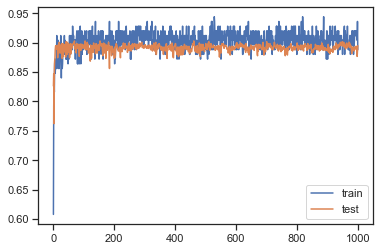

In [8]:
# Dropout
## Use exactly same NN but add Drpout Regularization

model_dropout = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_shape=(2,) ),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = tf.keras.optimizers.Adam(lr = 0.1)
model_dropout.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])

# Define validation set in order to accuracy can be recorder 
history_dropout = model_dropout.fit(train_X,
                train_y,
                validation_data = (test_X, test_y),
                batch_size = 2**5,
                epochs = 1000,
                verbose = 0)

# Plot the accucary and validation accuracy
plt.plot(history_dropout.history['accuracy'], label='train')
plt.plot(history_dropout.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Conclusion

Write short conclusion about results of used regularization methods

These tested regularisation techniques all decrease overfitting. 
When visually estimated L2 and L1 resemble each other the most. The validation accuracy is following the top line of training accuracy with L1_L2 and the bottom line with dropout technnique. L1_L2 is performing a bit worse than other techniques.